In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


PART A: Data Loading and Basic Inspection

In [42]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [43]:
print(df.head(10))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...       

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [44]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 1460, Columns: 81


In [45]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"Numerical columns: {len(num_cols)}")
print(f"Categorical columns: {len(cat_cols)}")

Numerical columns: 38
Categorical columns: 43


In [46]:
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [47]:
suspect_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].str.isnumeric().any()]
print("Possible incorrect types:", suspect_cols)

Possible incorrect types: []


PART B: Univariate Analysis

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

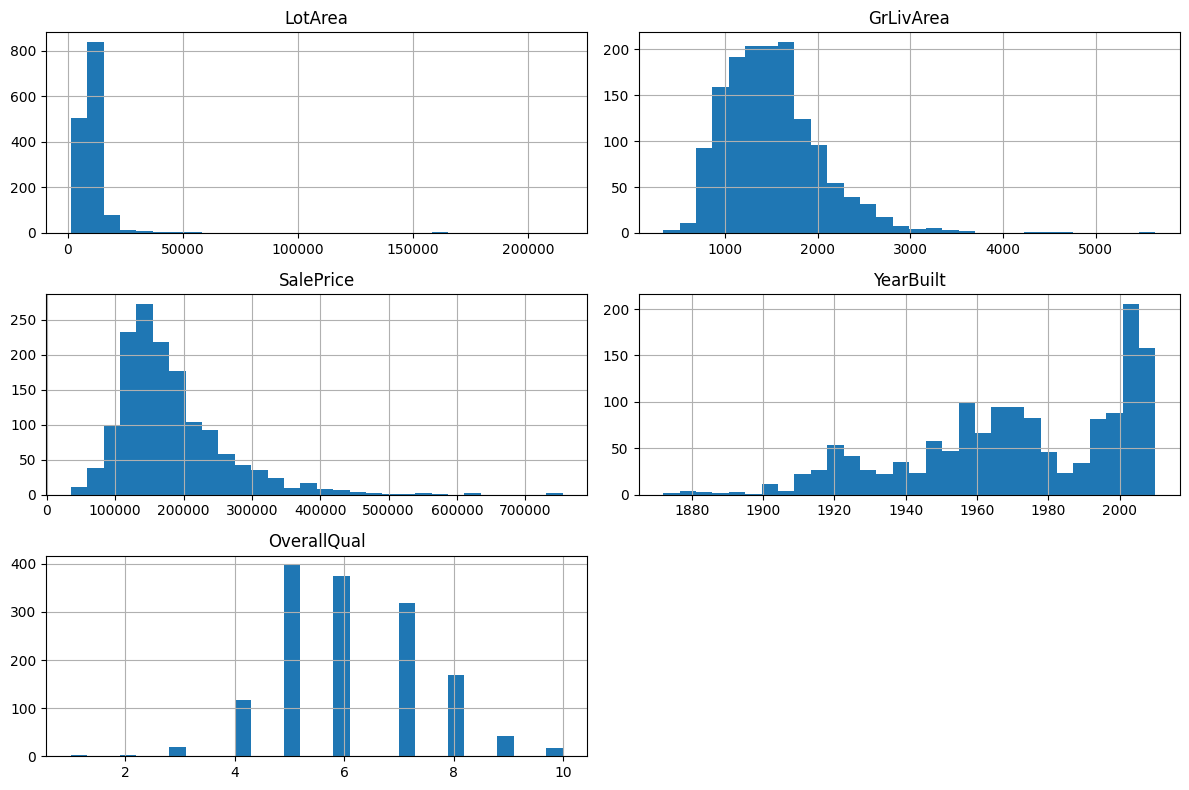

In [ ]:
#histograms -> numerical data
key_num_cols = ['LotArea', 'GrLivArea', 'SalePrice', 'YearBuilt', 'OverallQual']
df[key_num_cols].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [50]:
#skewness
for col in key_num_cols:
    print(f"{col} skewness: {df[col].skew():.2f}")

LotArea skewness: 12.21
GrLivArea skewness: 1.37
SalePrice skewness: 1.88
YearBuilt skewness: -0.61
OverallQual skewness: 0.22


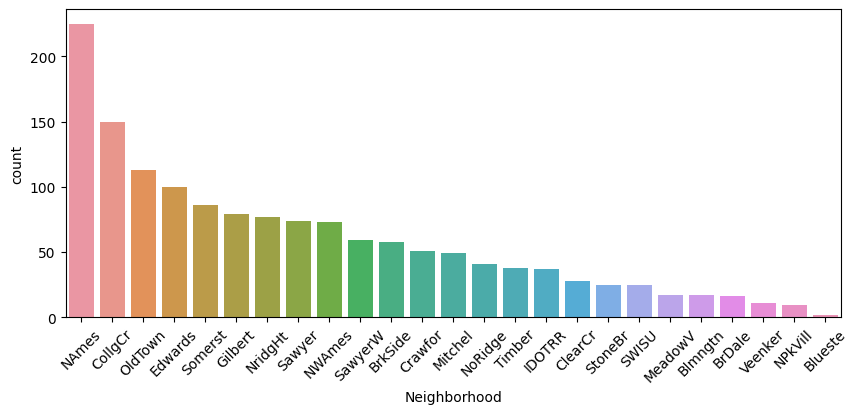

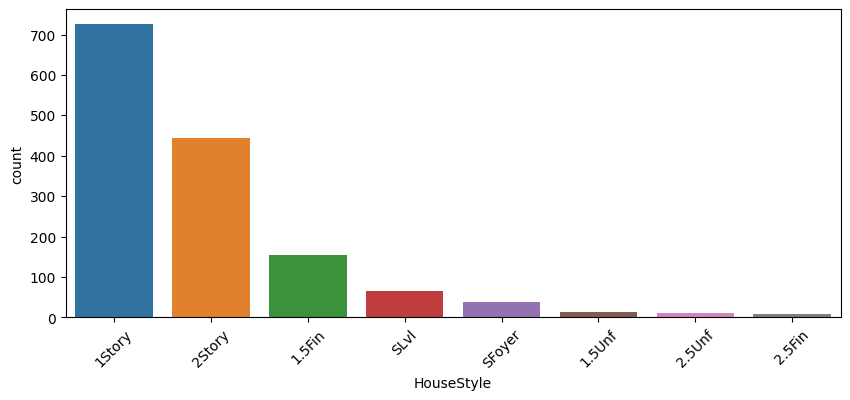

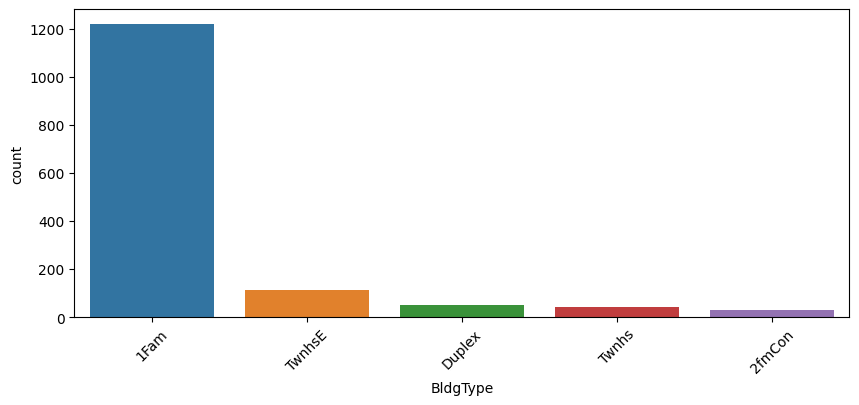

In [ ]:
#bar chart -> categorical data
key_cat_cols = ['Neighborhood', 'HouseStyle', 'BldgType']
for col in key_cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.show()

In [52]:
#top 10 frequent categories
top_cat_counts = df[cat_cols].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)
print(top_cat_counts.head(10))

TA         8261.0
Y          2705.0
Norm       2705.0
Gd         2684.0
Unf        2291.0
Pave       1495.0
AllPub     1459.0
CompShg    1434.0
GasA       1428.0
Gtl        1382.0
dtype: float64


In [53]:
# Imbalanced categories
imbalanced = {col: df[col].value_counts(normalize=True).max() for col in cat_cols}
imbalanced = {k:v for k,v in imbalanced.items() if v > 0.8}
print("Highly imbalanced:", imbalanced)

Highly imbalanced: {'Street': 0.9958904109589041, 'LandContour': 0.897945205479452, 'Utilities': 0.9993150684931507, 'LandSlope': 0.9465753424657535, 'Condition1': 0.863013698630137, 'Condition2': 0.9897260273972602, 'BldgType': 0.8356164383561644, 'RoofMatl': 0.9821917808219178, 'ExterCond': 0.8780821917808219, 'BsmtCond': 0.921293042867182, 'BsmtFinType2': 0.8832630098452883, 'Heating': 0.9780821917808219, 'CentralAir': 0.934931506849315, 'Electrical': 0.914324880054832, 'Functional': 0.9315068493150684, 'GarageQual': 0.9506889050036258, 'GarageCond': 0.9615663524292966, 'PavedDrive': 0.9178082191780822, 'MiscFeature': 0.9074074074074074, 'SaleType': 0.8678082191780822, 'SaleCondition': 0.8205479452054795}


PART C: Bivariate Analysis

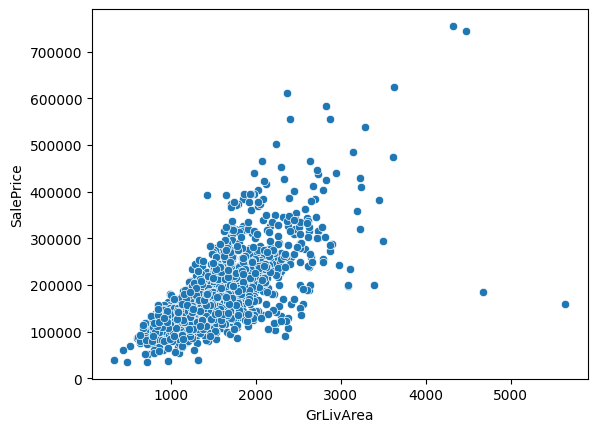

In [54]:
#scatter plot GrLivArea vs SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

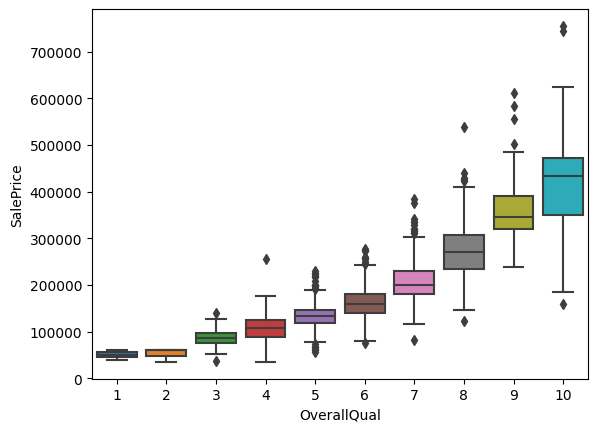

In [55]:
#boxplot SalePrice by OverallQual
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.show()

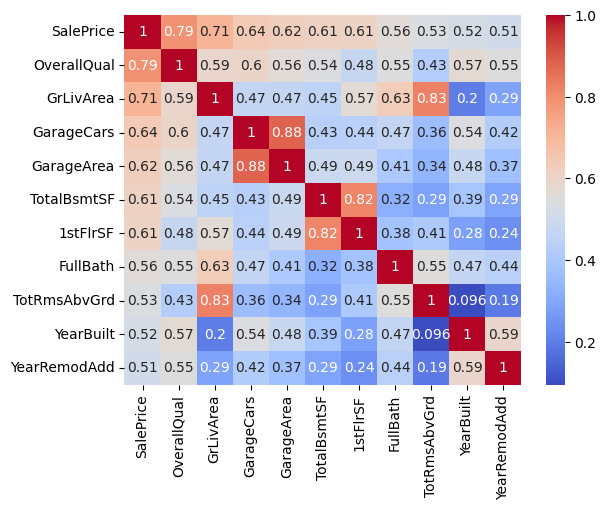

In [56]:
#correlation heatmap
corr = df.corr(numeric_only=True)['SalePrice'].abs().sort_values(ascending=False).head(11)
top_corr_features = corr.index
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.show()

In [57]:
#compare neighborhoods
neigh_compare = df[df['Neighborhood'].isin(['NridgHt', 'NAmes'])]
print(neigh_compare.groupby('Neighborhood')['SalePrice'].mean())

Neighborhood
NAmes      145847.080000
NridgHt    316270.623377
Name: SalePrice, dtype: float64


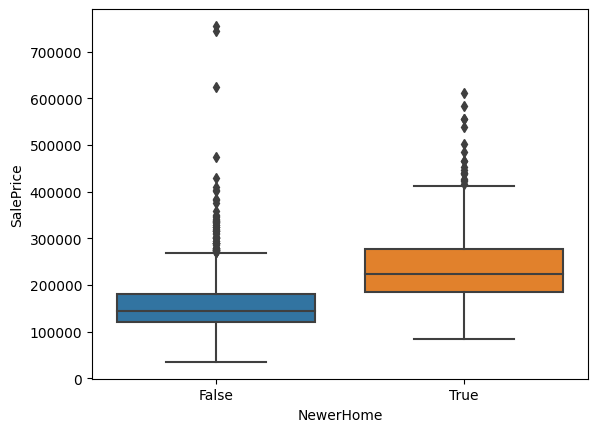

In [58]:
df['NewerHome'] = df['YearBuilt'] >= 2000
#boxplot
sns.boxplot(x='NewerHome', y='SalePrice', data=df)
plt.show()

In [59]:
#T-test
from scipy.stats import ttest_ind
new_homes = df[df['NewerHome']]['SalePrice']
old_homes = df[~df['NewerHome']]['SalePrice']
t_stat, p_val = ttest_ind(new_homes, old_homes, equal_var=False)
print(f"T-stat: {t_stat:.2f}, P-val: {p_val:.4f}")

T-stat: 18.00, P-val: 0.0000


PART D: Missing Value Treatment

In [60]:
#missing values
missing = df.isnull().sum().sort_values(ascending=False)
print(missing.head())

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
dtype: int64


In [61]:
# Imputation
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage']\
                      .transform(lambda x: x.fillna(x.median()))

print("Total missing values after imputation:", df.isnull().sum().sum())

Total missing values after imputation: 0


PART E: Outlier Detection & Treatment

In [62]:
#IQR outlier detection
def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

lot_outliers = iqr_outliers(df['LotArea'])
grliv_outliers = iqr_outliers(df['GrLivArea'])

print(f"LotArea outliers: {len(lot_outliers)}")
print(f"GrLivArea outliers: {len(grliv_outliers)}")

LotArea outliers: 69
GrLivArea outliers: 31


In [63]:
#cap outliers instead of removing
df['LotArea'] = np.where(df['LotArea'] > df['LotArea'].quantile(0.99),
                         df['LotArea'].quantile(0.99), df['LotArea'])
df['GrLivArea'] = np.where(df['GrLivArea'] > df['GrLivArea'].quantile(0.99),
                           df['GrLivArea'].quantile(0.99), df['GrLivArea'])

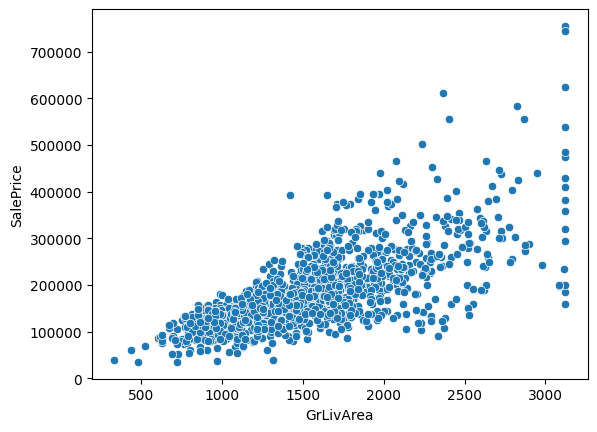

In [64]:
#scatter after capping
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

PART F: Encoding & Scaling

In [65]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [66]:
#One-hot encode categorical
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [67]:
#scale numerical
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [68]:
df_encoded.to_csv("house_prices_clean.csv", index=False)

Advanced Analysis

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
#log transform SalePrice
import numpy as np
print("Skew before:", df['SalePrice'].skew())
df['SalePrice'] = np.log1p(df['SalePrice'])
print("Skew after:", df['SalePrice'].skew())

Skew before: 1.8828757597682129
Skew after: 0.12134661989685329


In [73]:
#interaction effect
df['Qual_x_LivArea'] = df['OverallQual'] * df['GrLivArea']
print("Interaction feature 'Qual_x_LivArea' created.")

Interaction feature 'Qual_x_LivArea' created.
